<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [TensorFlow with TPU](/notebooks/tpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf

input1 = tf.ones((2, 3))
input2 = tf.reshape(tf.range(1, 7, dtype=tf.float32), (2, 3))
output = input1 + input2

with tf.Session():
  result = output.eval()
result  

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

### GitHub

For a full discussion of interactions between Colab and GitHub, see [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb). As a brief summary:

To save a copy of your Colab notebook to Github, select *File → Save a copy to GitHub…*

To load a specific notebook from github, append the github path to http://colab.research.google.com/github/.
For example to load this notebook in Colab: [https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb) use the following Colab URL: [https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb)

To open a github notebook in one click, we recommend installing the [Open in Colab Chrome Extension](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo).



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

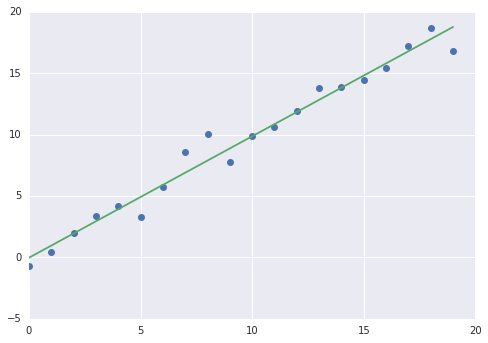

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

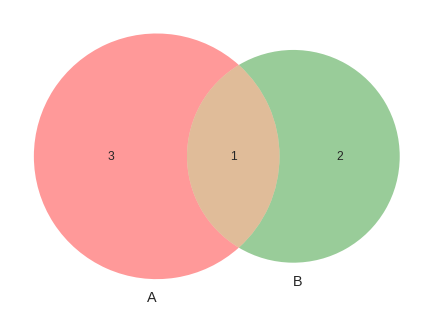

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
image_dim=32

In [0]:
def parse_function(filename):
    image_string=tf.read_file(filename)
    image=tf.image.decode_png(image_string,channels=3)
    image=tf.image.convert_image_dtype(image,tf.float32)

    resized_image=tf.image.resize_images(image,[image_dim,image_dim])
    return resized_image

def train_preprocess(image):
    image=tf.image.random_flip_left_right(image)
    image=tf.image.random_brightness(image,max_delta=32.0/255.0)
    image=tf.image.random_saturation(image,lower=0.5,upper=1.5)
    
    image=tf.clip_by_value(image,0.0,1.0)
    
    return image 


In [0]:
def read_data(filenames):
    dataset=tf.data.Dataset.from_tensor_slices((filenames))
    dataset=dataset.map(parse_function)
    dataset=dataset.map(train_preprocess)
    
    iterator=dataset.make_one_shot_iterator()
    return iterator


In [0]:
def build_training(filenames):
    X=np.zeros((len(filenames),image_dim,image_dim,3))
    iterator=read_data(filenames)
    next_element=iterator.get_next()
    with tf.Session() as sess:
        for i in range(len(filenames)):
            image_example=sess.run(next_element)
            X[i,:,:]=image_example[:,:,:]
        return X

In [23]:
filenames=['zero_1.PNG','zero_2.PNG','zero_3.PNG','zero_4.PNG','zero_5.PNG','zero_6.PNG','zero_7.PNG','zero_8.PNG','zero_9.PNG','zero_10.PNG','one_1.PNG','one_2.PNG','one_3.PNG','one_4.PNG','one_5.PNG','one_6.PNG','one_7.PNG','one_8.PNG','one_9.PNG','one_10.PNG','two_1.PNG','two_2.PNG','two_3.PNG','two_4.PNG','two_5.PNG','two_6.PNG','two_7.PNG','two_8.PNG','two_9.PNG','two_10.PNG','three_1.PNG','three_2.PNG','three_3.PNG','three_4.PNG','three_5.PNG','three_6.PNG','three_7.PNG','three_8.PNG','three_9.PNG','three_10.PNG','four_1.PNG','four_2.PNG','four_3.PNG','four_4.PNG','four_5.PNG','four_6.PNG','four_7.PNG','four_8.PNG','four_9.PNG','four_10.PNG','five_1.PNG','five_2.PNG','five_3.PNG','five_4.PNG','five_5.PNG','five_6.PNG','five_7.PNG','five_8.PNG','five_9.PNG','five_10.PNG','six_1.PNG','six_2.PNG','six_3.PNG','six_4.PNG','six_5.PNG','six_6.PNG','six_7.PNG','six_8.PNG','six_9.PNG','six_10.PNG','seven_1.PNG','seven_2.PNG','seven_3.PNG','seven_4.PNG','seven_5.PNG','seven_6.PNG','seven_7.PNG','seven_8.PNG','seven_9.PNG','seven_10.PNG','eight_1.PNG','eight_2.PNG','eight_3.PNG','eight_4.PNG','eight_5.PNG','eight_6.PNG','eight_7.PNG','eight_8.PNG','eight_9.PNG','eight_10.PNG','nine_1.PNG','nine_2.PNG','nine_3.PNG','nine_4.PNG','nine_5.PNG','nine_6.PNG','nine_7.PNG','nine_8.PNG','nine_9.PNG','nine_10.PNG']
Y=np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9])
X=build_training(filenames)

model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(image_dim*image_dim*3,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(optimizer='adam',lr=0.1,beta_1=0.9, beta_2=0.999,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X,Y,epochs=5000,batch_size=150)
model.summary()
model.evaluate(X,Y)

Epoch 1/5000
100/100 [==============================] - 1s 9ms/step - loss: 2.3996 - acc: 0.0900
Epoch 2/5000
100/100 [==============================] - 0s 1ms/step - loss: 6.9746 - acc: 0.1000
Epoch 3/5000
100/100 [==============================] - 0s 1ms/step - loss: 7.5867 - acc: 0.1000
Epoch 4/5000
100/100 [==============================] - 0s 1ms/step - loss: 7.6232 - acc: 0.1000
Epoch 5/5000
100/100 [==============================] - 0s 1ms/step - loss: 8.1427 - acc: 0.1000
Epoch 6/5000
100/100 [==============================] - 0s 2ms/step - loss: 8.6705 - acc: 0.1000
Epoch 7/5000
100/100 [==============================] - 0s 2ms/step - loss: 8.0055 - acc: 0.1000
Epoch 8/5000
100/100 [==============================] - 0s 2ms/step - loss: 8.0954 - acc: 0.1000
Epoch 9/5000
100/100 [==============================] - 0s 2ms/step - loss: 8.1192 - acc: 0.1000
Epoch 10/5000
100/100 [==============================] - 0s 2ms/step - loss: 8.2971 - acc: 0.1000
Epoch 11/5000
100/100 [======

[0.011017615478485822, 1.0]

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


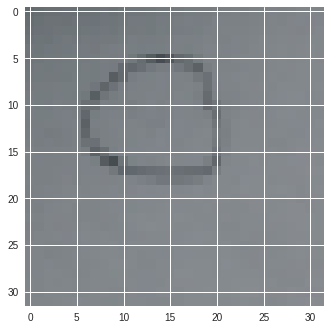

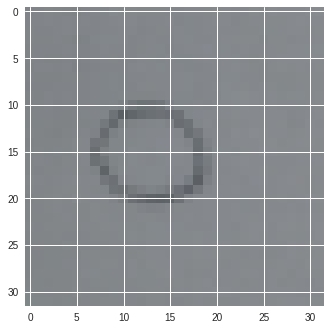

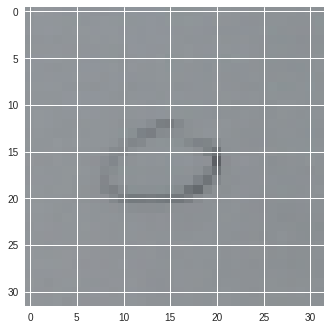

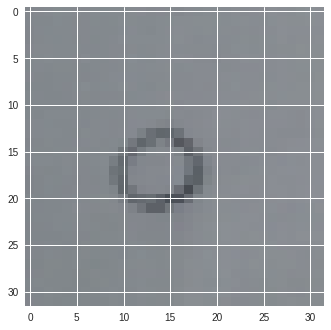

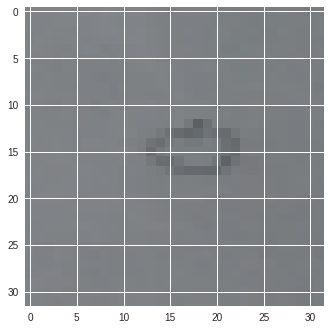

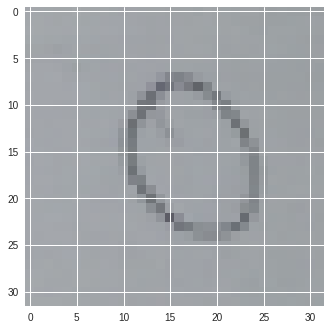

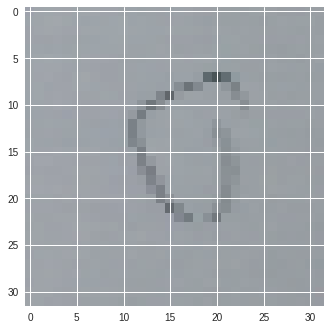

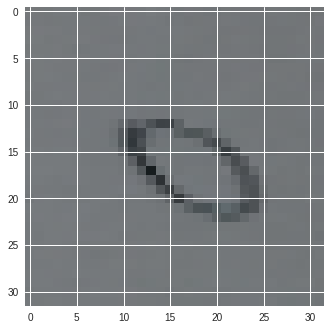

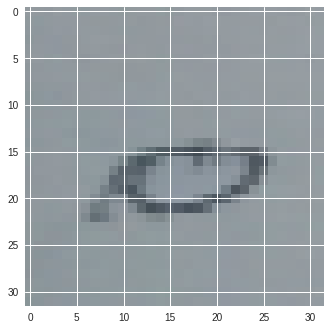

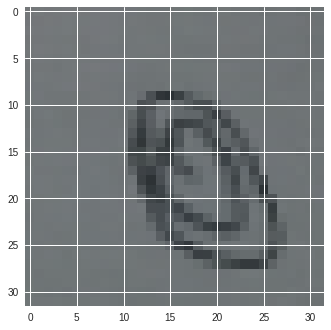

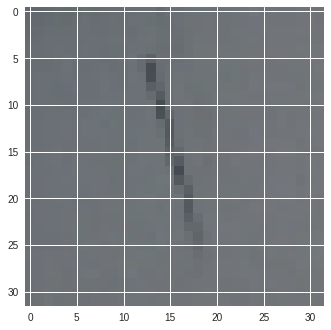

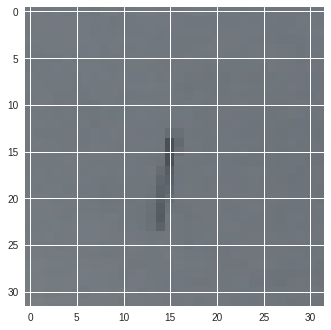

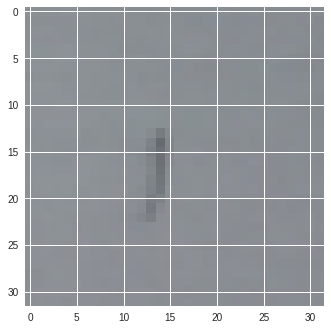

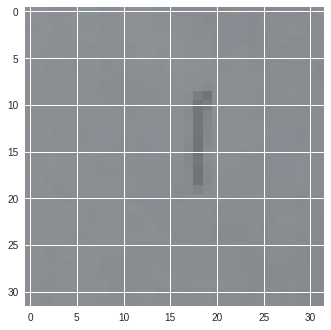

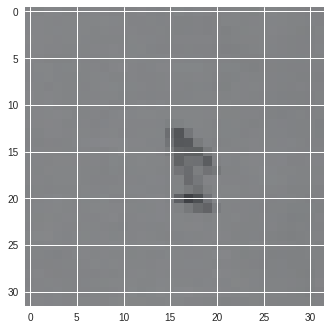

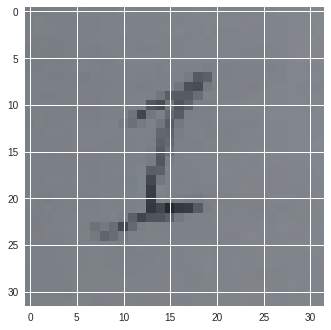

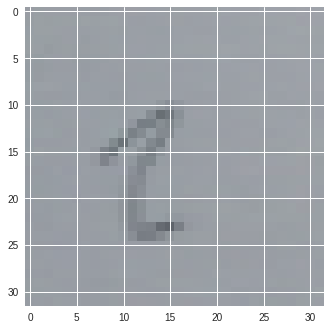

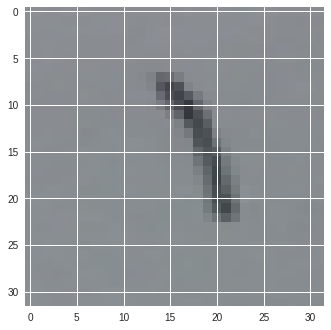

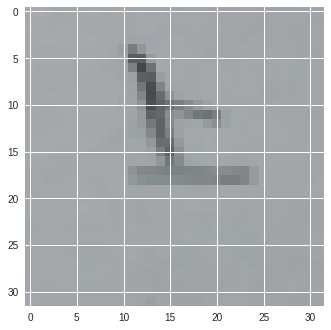

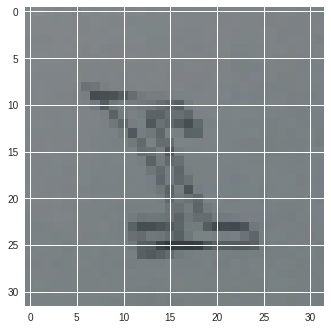

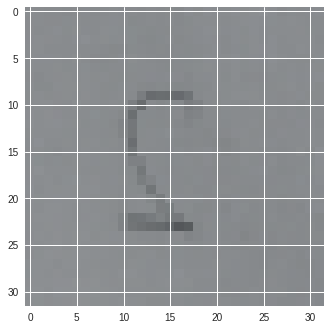

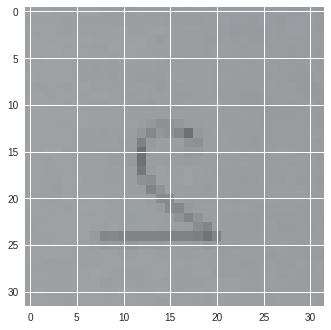

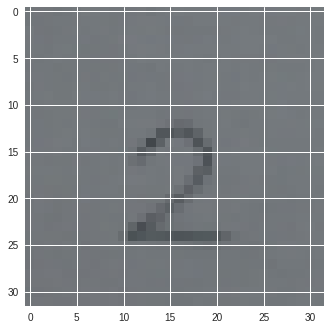

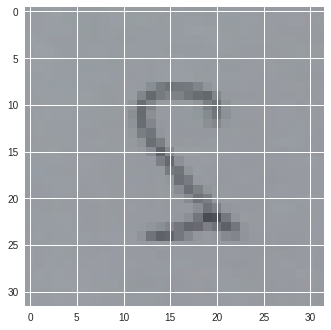

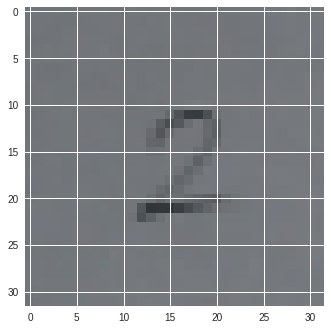

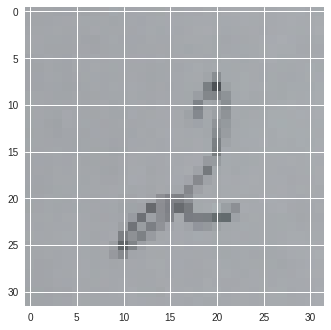

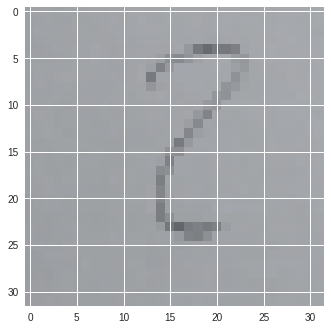

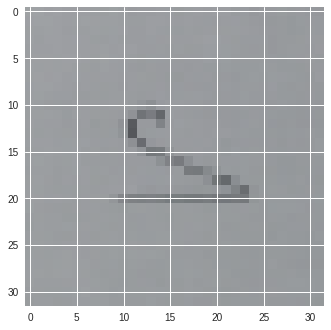

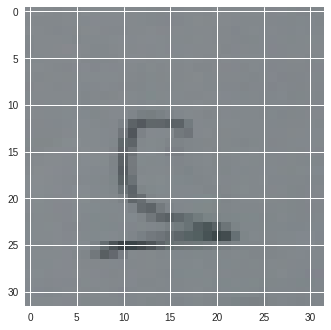

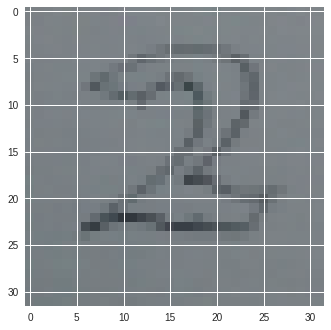

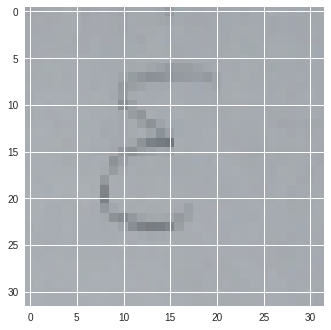

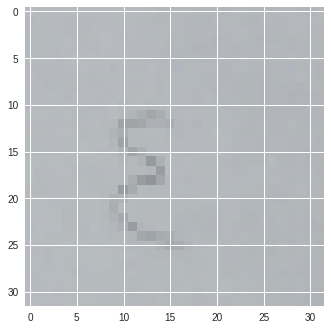

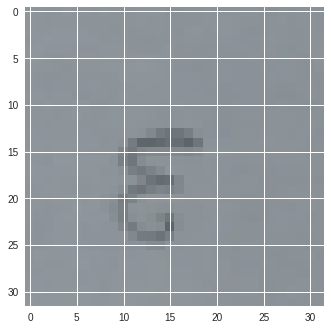

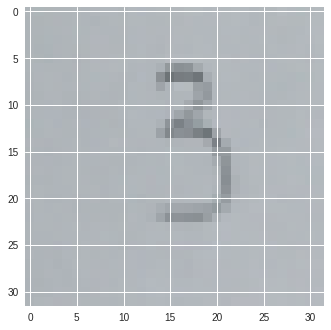

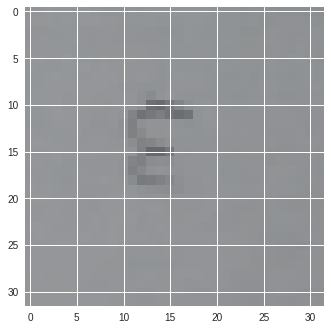

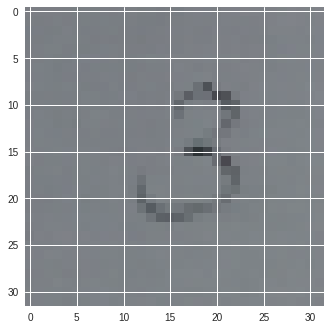

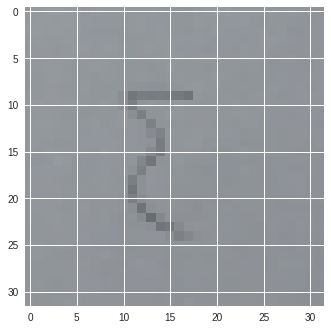

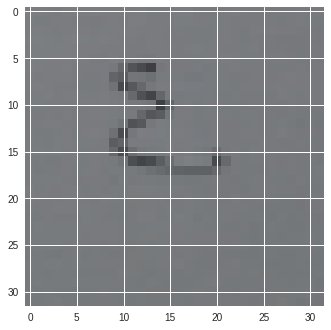

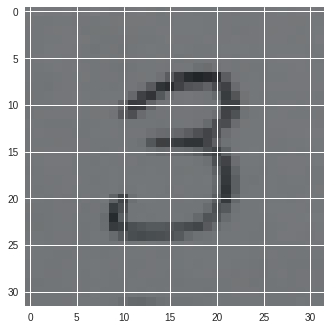

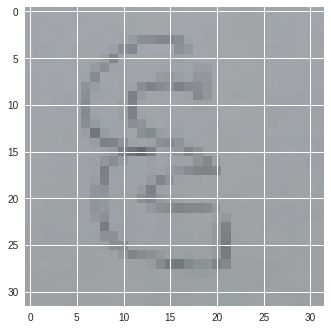

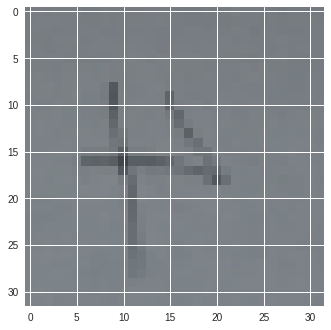

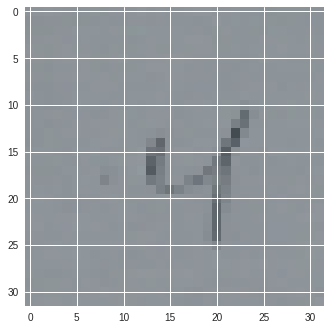

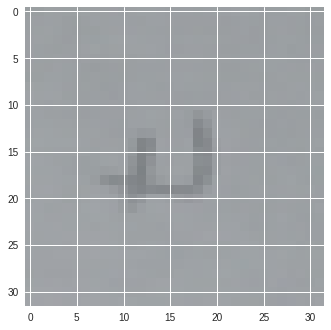

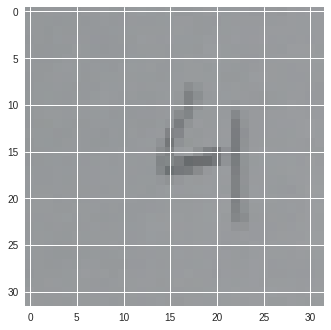

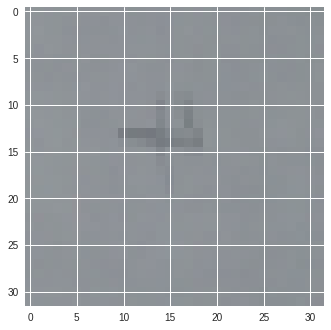

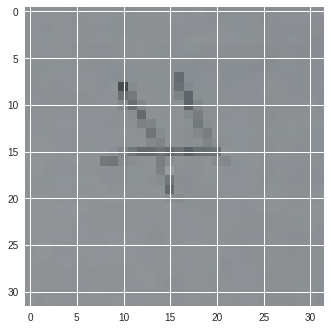

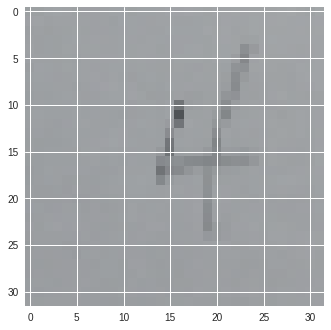

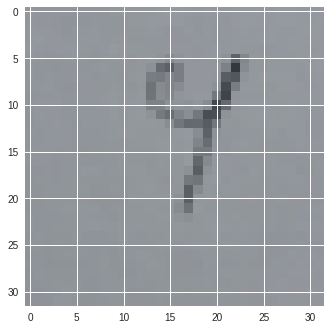

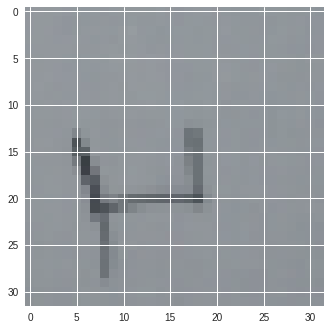

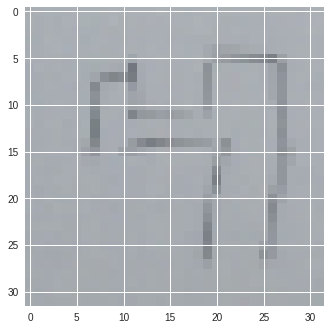

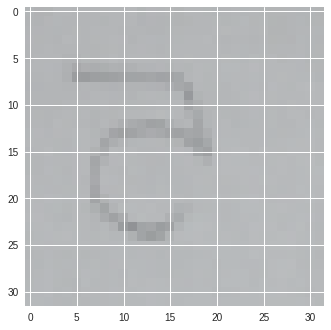

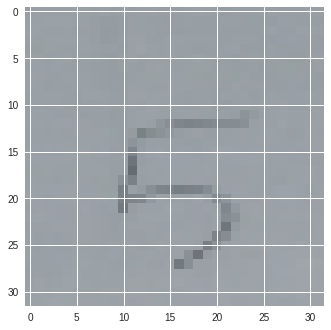

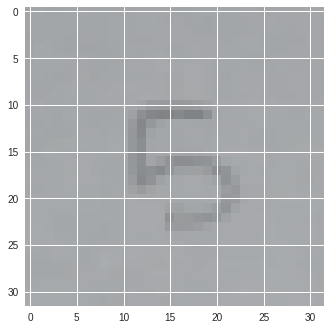

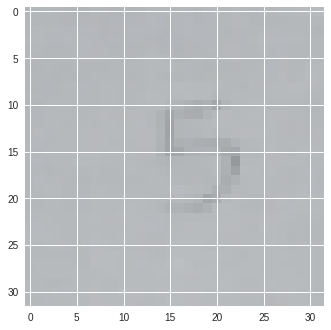

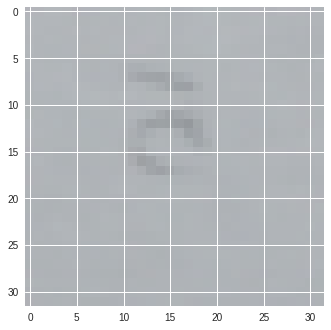

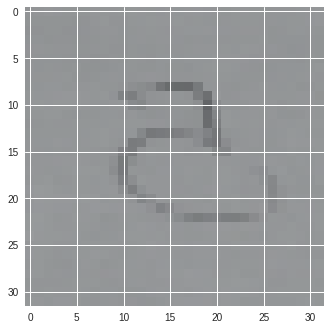

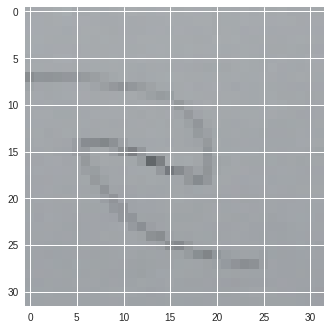

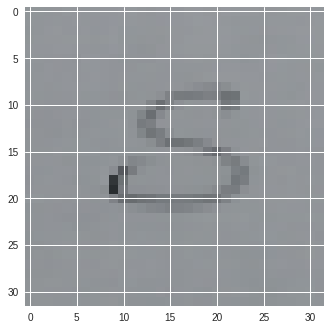

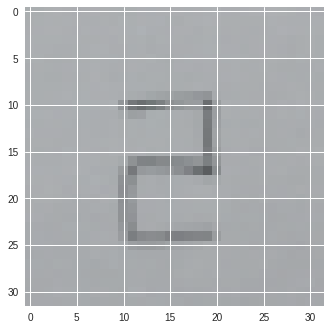

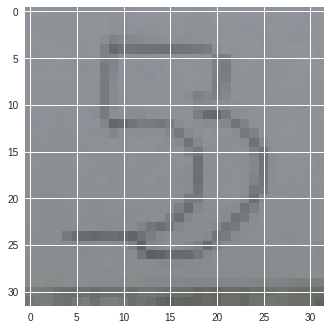

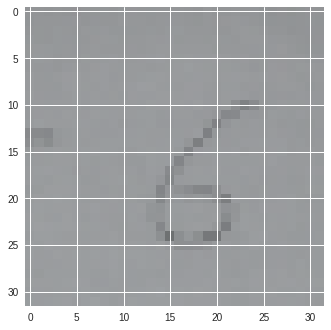

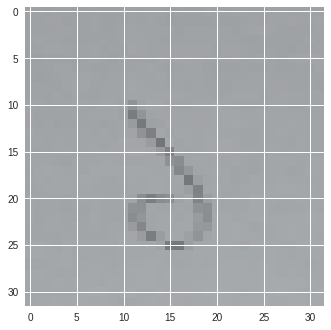

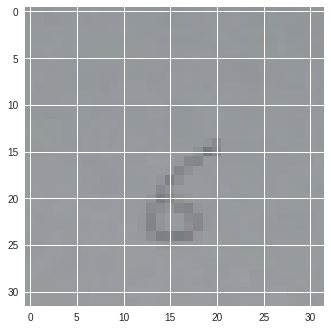

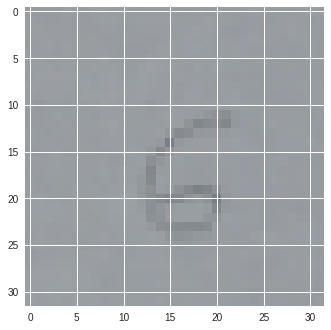

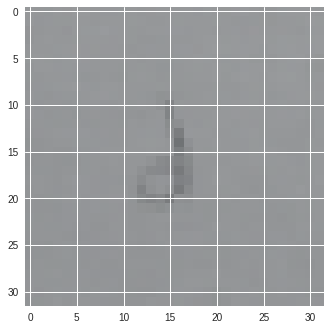

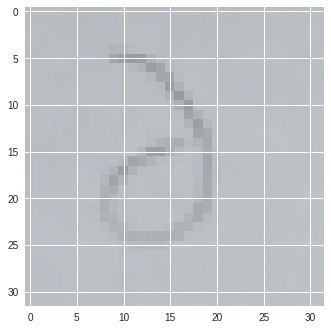

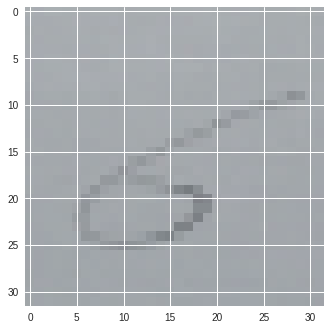

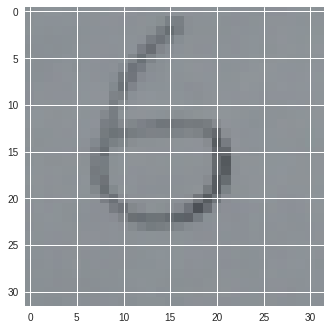

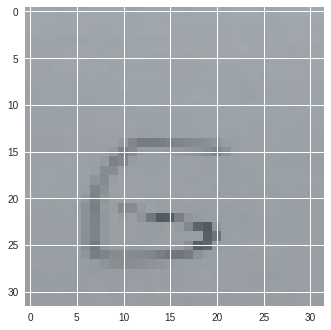

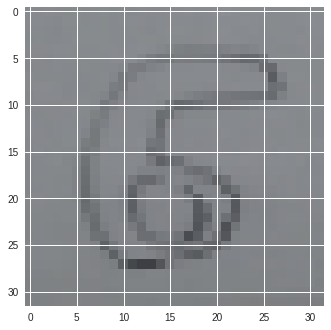

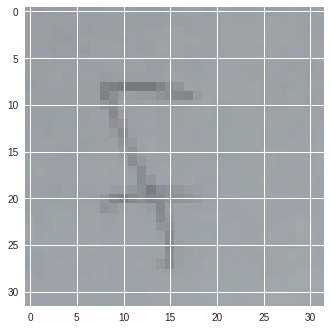

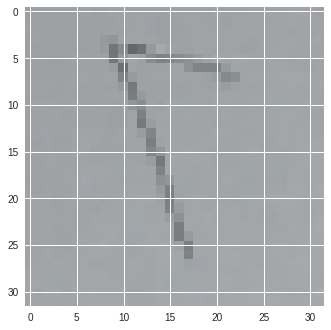

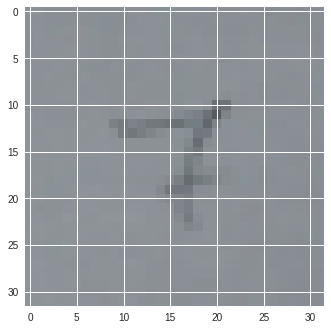

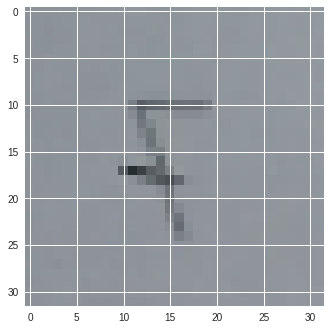

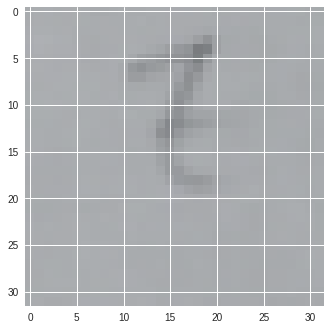

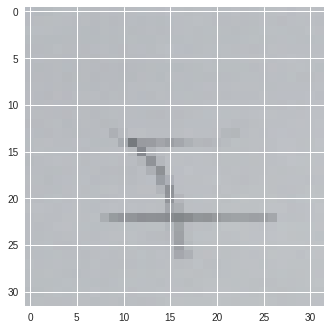

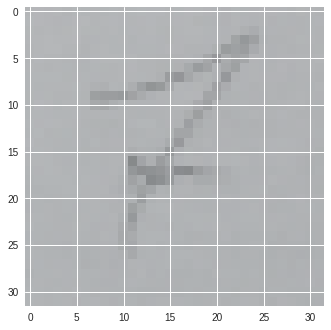

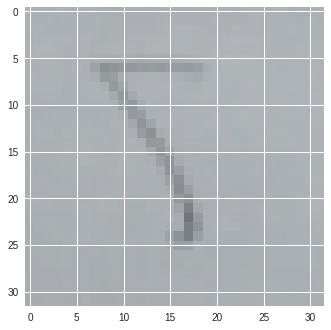

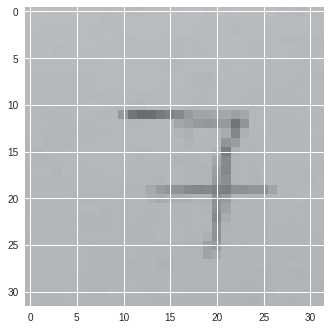

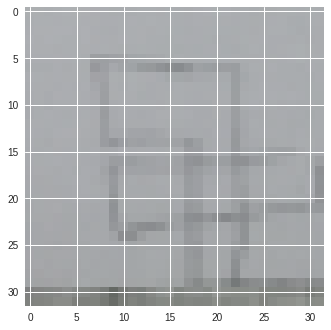

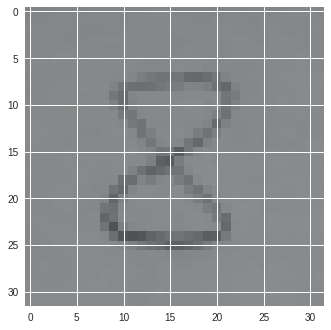

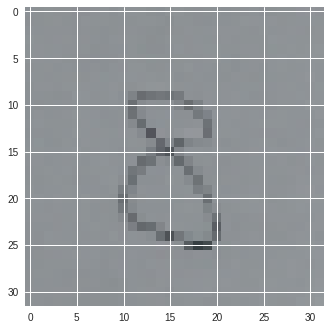

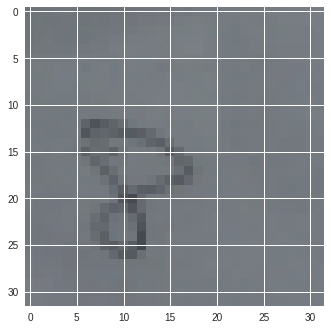

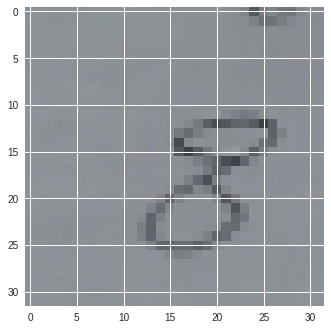

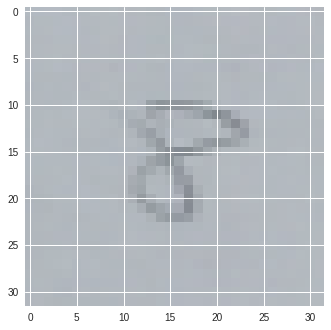

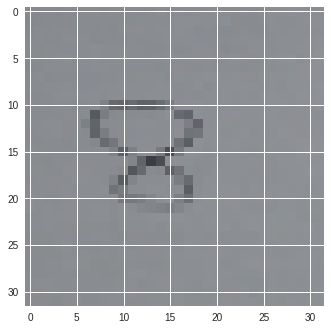

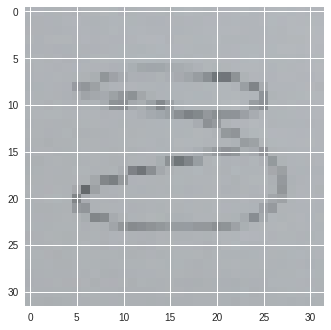

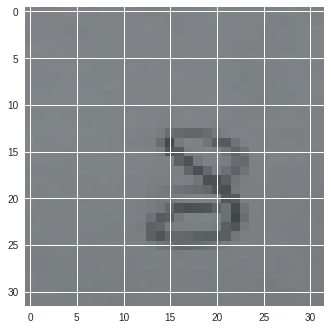

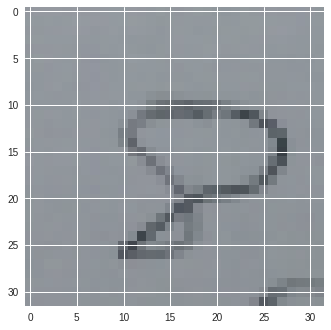

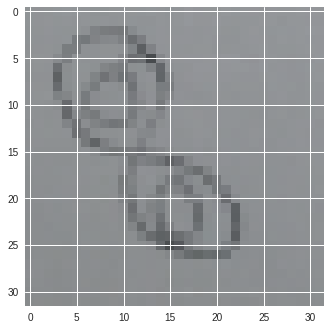

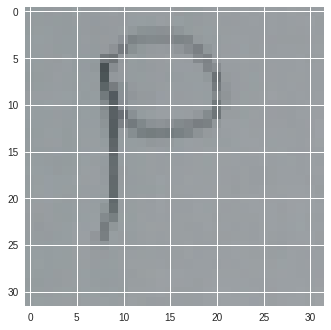

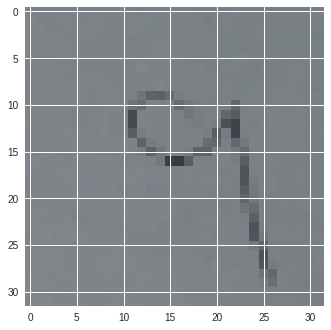

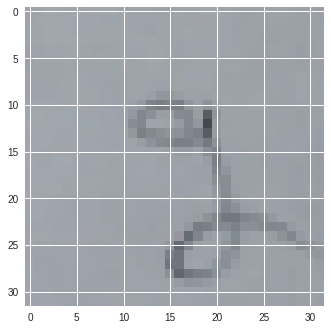

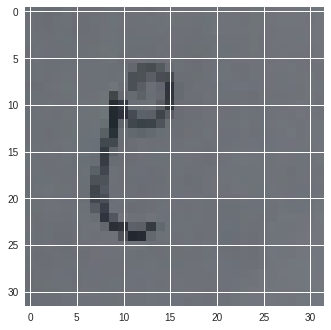

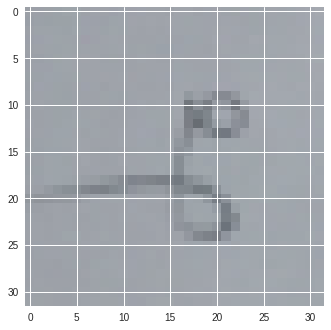

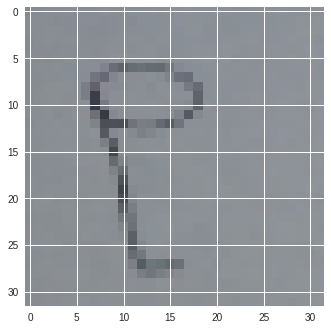

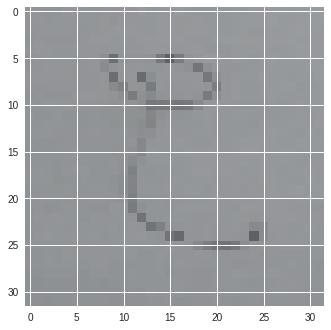

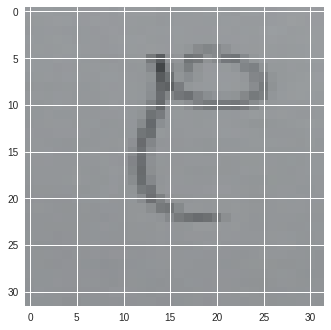

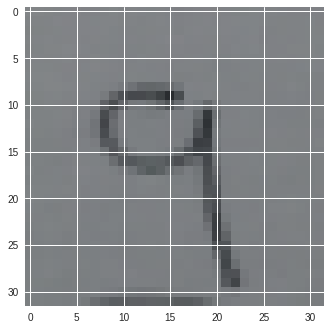

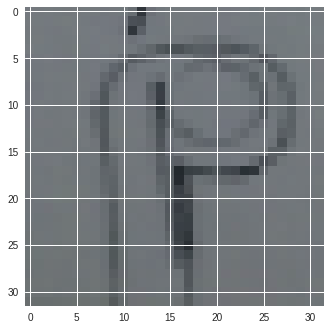

In [25]:
import numpy as np
filenames=['zero_1.PNG','zero_2.PNG','zero_3.PNG','zero_4.PNG','zero_5.PNG','zero_6.PNG','zero_7.PNG','zero_8.PNG','zero_9.PNG','zero_10.PNG','one_1.PNG','one_2.PNG','one_3.PNG','one_4.PNG','one_5.PNG','one_6.PNG','one_7.PNG','one_8.PNG','one_9.PNG','one_10.PNG','two_1.PNG','two_2.PNG','two_3.PNG','two_4.PNG','two_5.PNG','two_6.PNG','two_7.PNG','two_8.PNG','two_9.PNG','two_10.PNG','three_1.PNG','three_2.PNG','three_3.PNG','three_4.PNG','three_5.PNG','three_6.PNG','three_7.PNG','three_8.PNG','three_9.PNG','three_10.PNG','four_1.PNG','four_2.PNG','four_3.PNG','four_4.PNG','four_5.PNG','four_6.PNG','four_7.PNG','four_8.PNG','four_9.PNG','four_10.PNG','five_1.PNG','five_2.PNG','five_3.PNG','five_4.PNG','five_5.PNG','five_6.PNG','five_7.PNG','five_8.PNG','five_9.PNG','five_10.PNG','six_1.PNG','six_2.PNG','six_3.PNG','six_4.PNG','six_5.PNG','six_6.PNG','six_7.PNG','six_8.PNG','six_9.PNG','six_10.PNG','seven_1.PNG','seven_2.PNG','seven_3.PNG','seven_4.PNG','seven_5.PNG','seven_6.PNG','seven_7.PNG','seven_8.PNG','seven_9.PNG','seven_10.PNG','eight_1.PNG','eight_2.PNG','eight_3.PNG','eight_4.PNG','eight_5.PNG','eight_6.PNG','eight_7.PNG','eight_8.PNG','eight_9.PNG','eight_10.PNG','nine_1.PNG','nine_2.PNG','nine_3.PNG','nine_4.PNG','nine_5.PNG','nine_6.PNG','nine_7.PNG','nine_8.PNG','nine_9.PNG','nine_10.PNG']

Y=np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9])
X=build_training(filenames)


for i in range(100):
    plt.figure()
    plt.imshow(X[i,:,:,:])